In [233]:
import pandas as pd
import numpy as np

In [234]:
df = pd.read_csv('Telco_Customer_Churn.csv')

# Written Analysis.

In [235]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


I notice there are alot of non-numerical columns, will need to encode most of the labels so i can feed the model appropriately

1- First insight: Data needs encoding

2- There is an unimportant -> customerID

3- There are no null values in the whole dataset.

4- the total charges column should be a float64 column , object Dtype is incorrect for the stored data in the dataset

In [237]:
df.drop('customerID', axis=1, inplace=True)

In [238]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [239]:
df['gender'].value_counts()
#The gender is looking balanced and there is no bias towards 1 gender in the dataset.

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [240]:
df['Churn'].value_counts()
# I notice a 3:1 ratio between the target column outcomes is not well balanced. I might need to resample the data to balance the target column.

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [241]:
# I fixed the Dtype for the totalCharges column so i can view the describtion for the numeric data of my dataset.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()
# I have 11 missing values in the TotalCharges column.

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [242]:
df.describe()
# I notice some zero values which could be incorrect since this is a customers dataset,
# which means any customer must have atleast 1 month of tenure , so zero is  not a correct value in any row for tenure probably,
# I assume 0 tenure is a mistake so i will just replace it with the median value of the tenure column.


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [243]:
df['tenure'].replace(0, df['tenure'].median(), inplace=True)
df.describe()

C:\Users\AhmadJerjees\AppData\Local\Temp\ipykernel_6016\2296177579.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tenure'].replace(0, df['tenure'].median(), inplace=True)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.416442,64.761692,2283.300441
std,0.368612,24.526454,30.090047,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [244]:
# For these values i know how to calculate the TotalCharge by multiplying the MonthlyCharges by the tenure.
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[['TotalCharges']] = imputer.fit_transform(df[['TotalCharges']])

#df['TotalCharges'].fillna(df['MonthlyCharges']*df['tenure'], inplace=True)
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [245]:
df.describe()
# The description for the seniorCitizen Column is not needed, since it's a categorical column.
# But I notice the other 3 columns have high Std deviation, which means the data is spread out and not close to the mean. I will need to scale them later on.


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.416442,64.761692,2283.300441
std,0.368612,24.526454,30.090047,2265.000258
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


5- Fifth Insight : Data needs scaling



In [246]:
DeviatedColumns = ['tenure', 'MonthlyCharges', 'TotalCharges']


## Visual Analysis

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

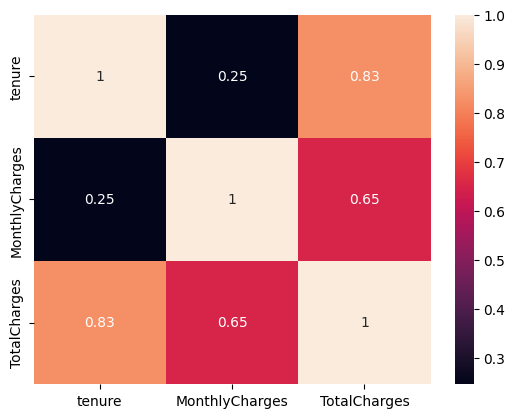

In [248]:
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True)
# No important insights from the heatmap can be told, since the correlation is already known from the dataset description with common sense.

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [250]:
# As observed from the dataset I need to combine the data 'No phone service'/'No Internet Service' To essentially 'No' in the MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies columns.
df.replace('No phone service', 'No', inplace=True)
df.replace('No internet service', 'No', inplace=True)


## Encoding Categorical Columns

In [251]:
# I need to convert the categorical columns to numerical columns using one hot encoding.
df['gender'] = np.where(df['gender'] == 'Female', 1,0)

binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn','MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in binary_cols:
    df[col] = np.where(df[col] == 'Yes', 1, 0)
df = pd.get_dummies(df,columns=['InternetService','Contract','PaymentMethod'], drop_first=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,False,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,False,False,True,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,False,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,False,False,True,False,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,True,False,False,False,False,True,False


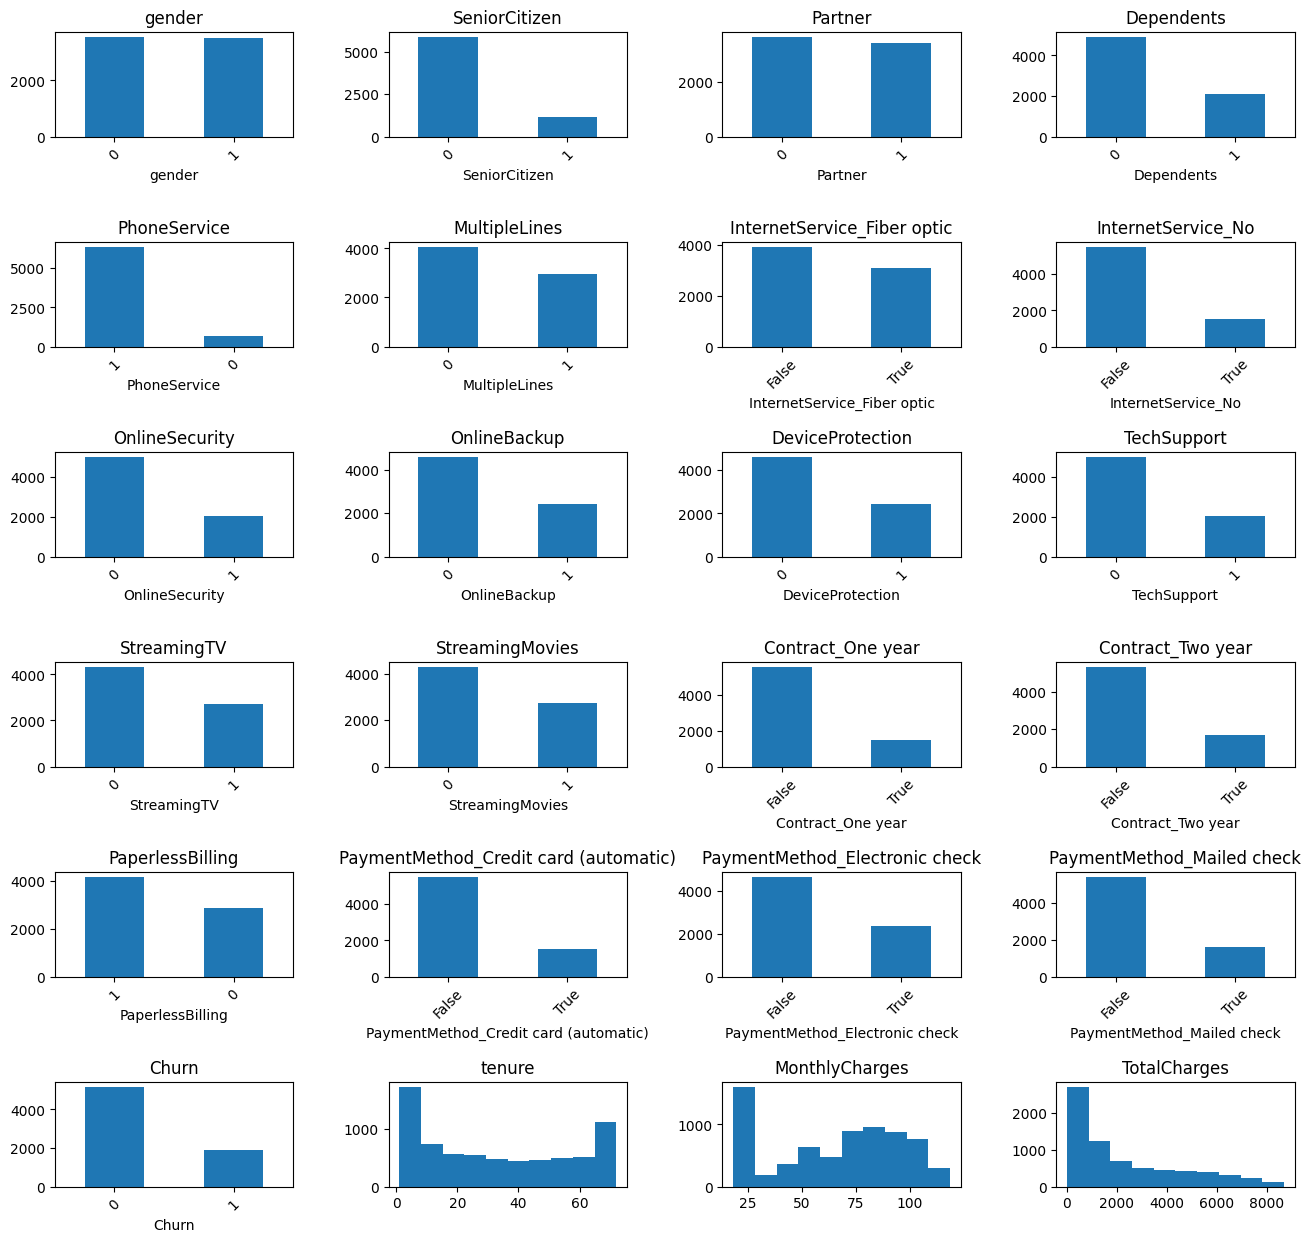

In [252]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(6, 4, figsize=(16, 15))
ax = ax.flatten() 

categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                       'MultipleLines', 'InternetService_Fiber optic','InternetService_No', 'OnlineSecurity', 'OnlineBackup', 
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                       'Contract_One year','Contract_Two year', 'PaperlessBilling', 'PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check', 'Churn']

numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

columns_to_plot = categorical_columns + numerical_columns

for i, col in enumerate(columns_to_plot):
    if col in categorical_columns:
        df[col].value_counts().plot(kind='bar', ax=ax[i])
        ax[i].tick_params(axis='x', rotation=45)  
    else:
        ax[i].hist(df[col])
    
    ax[i].set_title(col)

plt.subplots_adjust(wspace=0.4, hspace=1)  
plt.show()


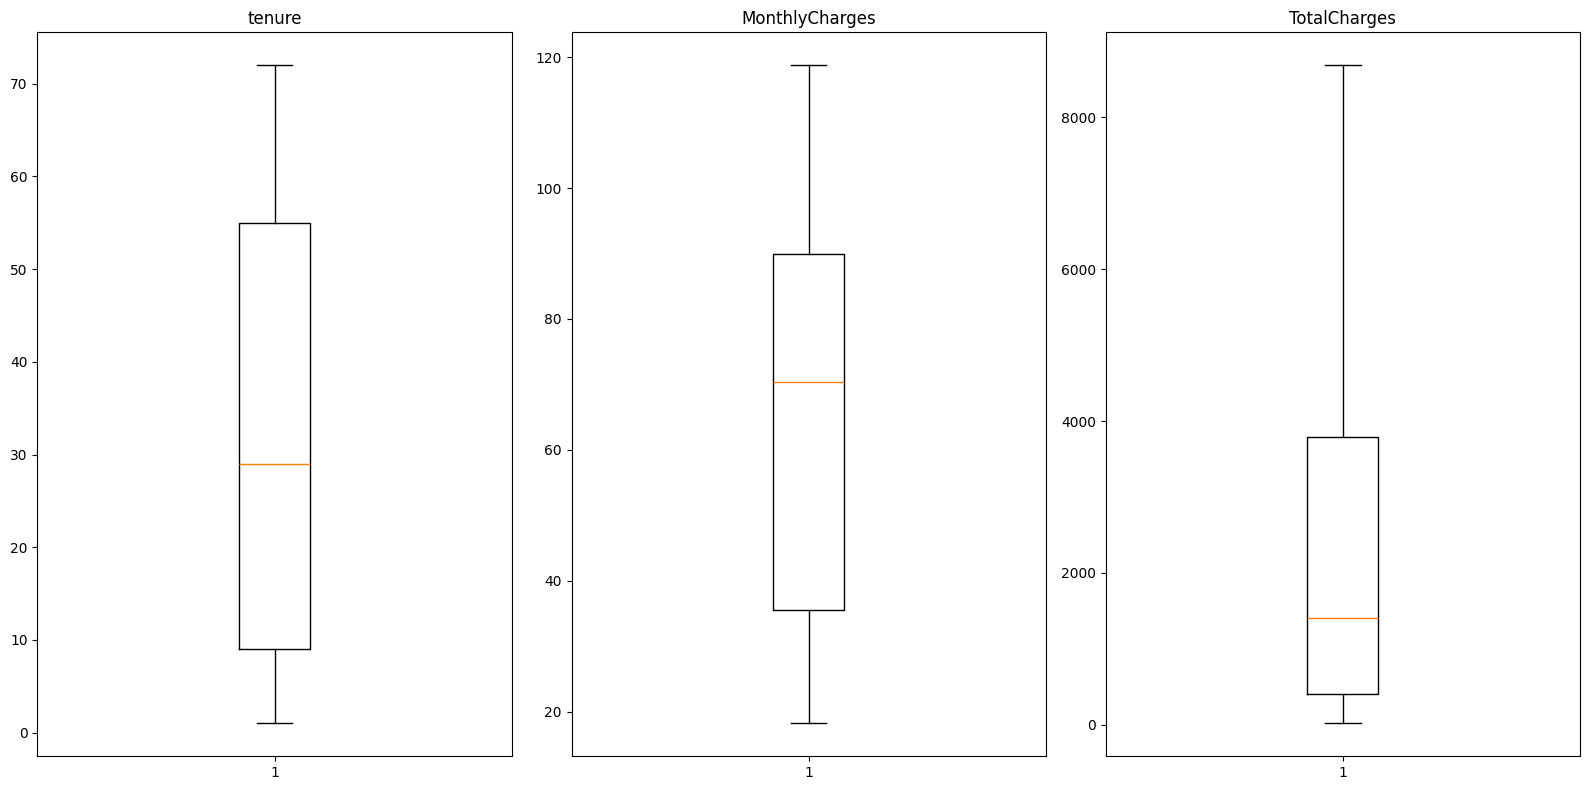

In [253]:
fig,ax = plt.subplots(1,3, figsize=(16,8))

ax[0].title.set_text('tenure')
ax[0].boxplot(df['tenure'])

ax[1].title.set_text('MonthlyCharges')
ax[1].boxplot(df['MonthlyCharges'])

ax[2].title.set_text('TotalCharges')
ax[2].boxplot(df['TotalCharges'])

plt.tight_layout()
plt.show()

# Apparently there are no outliers in the dataset.

## Scaling the deviated columns

In [254]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[DeviatedColumns] = scaler.fit_transform(df[DeviatedColumns])
df[DeviatedColumns].describe()

,tenure,MonthlyCharges,TotalCharges
count,7.043000e+03,7.043000e+03,7.043000e+03
mean,-9.029331e-17,-6.406285e-17,8.070910e-17
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.281012e+00,-1.545860e+00,-9.998503e-01
25%,-9.548100e-01,-9.725399e-01,-8.305558e-01
50%,-1.393061e-01,1.857327e-01,-3.897629e-01
75%,9.208490e-01,8.338335e-01,6.637555e-01
max,1.614027e+00,1.794352e+00,2.826469e+00


In [255]:
import pickle # saving the model
filename = 'Models/ChurnPredictionScaler.pkl'

with open(filename,'wb') as file:
    pickle.dump(scaler, file)

    print(f'Model has been saved as {filename}')

Model has been saved as Models/ChurnPredictionScaler.pkl


# Splitting the data for the model now.

In [256]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [257]:
from imblearn.over_sampling import BorderlineSMOTE
borderine_SMOTE=BorderlineSMOTE()
X, y = borderine_SMOTE.fit_resample(X, y)

In [258]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [259]:
print(df.shape)
print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")

print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

(7043, 24)
X_train shape: (8278, 23)
X_test shape: (2070, 23)
y_train shape: (8278,)
y_test shape: (2070,)


In [260]:

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [261]:

rf = RandomForestClassifier(
    n_estimators=100, max_depth=5, min_samples_split=10, 
    min_samples_leaf=5, class_weight="balanced", random_state=42
)
rf.fit(x_train, y_train)

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

Train Accuracy: 0.7777240879439478
Test Accuracy: 0.7830917874396135
              precision    recall  f1-score   support

           0       0.84      0.69      0.76      1021
           1       0.74      0.87      0.80      1049

    accuracy                           0.78      2070
   macro avg       0.79      0.78      0.78      2070
weighted avg       0.79      0.78      0.78      2070



In [262]:
lr = LogisticRegression(random_state=42, class_weight="balanced")
lr.fit(x_train, y_train)

y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

Train Accuracy: 0.779777724087944
Test Accuracy: 0.793719806763285
              precision    recall  f1-score   support

           0       0.83      0.73      0.78      1021
           1       0.77      0.85      0.81      1049

    accuracy                           0.79      2070
   macro avg       0.80      0.79      0.79      2070
weighted avg       0.80      0.79      0.79      2070



In [263]:
svm = svm.SVC(kernel='linear', class_weight='balanced', random_state=42)
svm.fit(x_train, y_train)

y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

Train Accuracy: 0.780381734718531
Test Accuracy: 0.7961352657004831
              precision    recall  f1-score   support

           0       0.84      0.72      0.78      1021
           1       0.76      0.87      0.81      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.79      2070
weighted avg       0.80      0.80      0.80      2070



In [266]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(x_train, y_train)

y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

Train Accuracy: 0.938994926310703
Test Accuracy: 0.8328502415458937
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1021
           1       0.80      0.89      0.84      1049

    accuracy                           0.83      2070
   macro avg       0.84      0.83      0.83      2070
weighted avg       0.84      0.83      0.83      2070



c:\Users\AhmadJerjees\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [07:41:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [273]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=500)
mlp.fit(x_train, y_train)

y_pred_train = mlp.predict(x_train)
y_pred_test = mlp.predict(x_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

Train Accuracy: 0.9003382459531287
Test Accuracy: 0.8159420289855073
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1021
           1       0.81      0.83      0.82      1049

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



In [276]:
from sklearn.metrics import roc_auc_score

print("Random Forest AUC:", roc_auc_score(y_test, rf.predict_proba(x_test)[:,1]))
print("Logistic Regression AUC:", roc_auc_score(y_test, lr.predict_proba(x_test)[:,1]))
print("SVM AUC:", roc_auc_score(y_test, svm.decision_function(x_test)))
print("XGBoost AUC:", roc_auc_score(y_test, xgb.predict_proba(x_test)[:,1]))
print("MLP AUC:", roc_auc_score(y_test, mlp.predict_proba(x_test)[:,1]))


Random Forest AUC: 0.8486833689844067
Logistic Regression AUC: 0.8673163845236684
SVM AUC: 0.8682547344656399
XGBoost AUC: 0.9039181011905372
MLP AUC: 0.8882233814397182


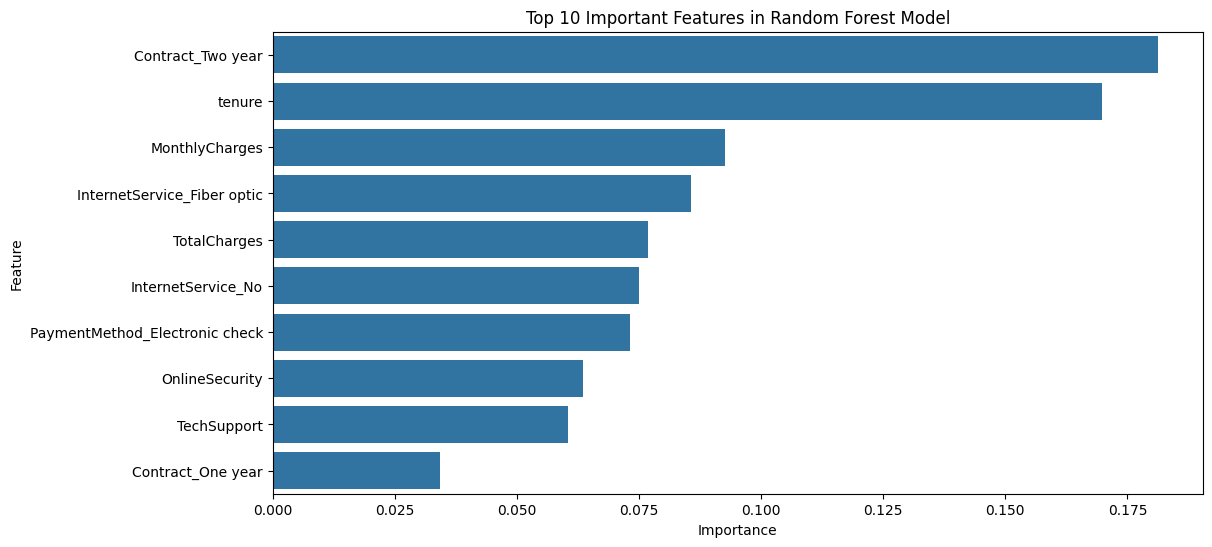

In [ ]:
importances_rf = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importances_rf})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df[:10])
plt.title("Top 10 Important Features in Random Forest Model")
plt.show()
